## Data Analysis on titanic dataset
### Importing all libraries


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

In [4]:
data = sns.load_dataset('titanic')
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


#### Doing the analysis and using describe function

In [5]:
data.describe()

,survived,pclass,age,sibsp,parch,fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Using info function in which we can easily find the null values or NaN values.

##### In this dataset age column having null values and deck column have so many null values and in embarked column only 2 null values are there.
##### As age column is important for us so we will not drop the null values we will fill the null values.
##### In deck column the percentage of null values is more than 75% so we will drop that column.
##### In embarked column only two null values are there so we will drop the null values not that column.


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   survived     891 non-null    int64   
 1   pclass       891 non-null    int64   
 2   sex          891 non-null    object  
 3   age          714 non-null    float64 
 4   sibsp        891 non-null    int64   
 5   parch        891 non-null    int64   
 6   fare         891 non-null    float64 
 7   embarked     889 non-null    object  
 8   class        891 non-null    category
 9   who          891 non-null    object  
 10  adult_male   891 non-null    bool    
 11  deck         203 non-null    category
 12  embark_town  889 non-null    object  
 13  alive        891 non-null    object  
 14  alone        891 non-null    bool    
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.7+ KB


In [8]:
data.isna().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [10]:
data['age'].fillna(data['age'].median(),inplace=True)

In [12]:
data.drop(columns=['deck'],inplace=True)


In [14]:
data.dropna(subset=['embark_town'],inplace=True)

In [16]:
data.head(5)

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,Southampton,no,True


#### After that we will do the label encoding for age column as MALE:0 and FEMALE:1.

In [19]:
data['sex']=data['sex'].map({'male':0,'female':1})

#### And here again for the embarked column we will do the label encoding S:0 ,C:1 and for Q:2.

In [29]:
data['embarked'].value_counts()

embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [31]:
data['embarked']=data['embarked'].map({'S':0,'C':1,'Q':2})

### We will start doing EDA from Univariate analysis.

##### In this we are doing our analysis by plotting the histogram for age column only.So by this we will get to know what's the maximum number of age people are in the ship.

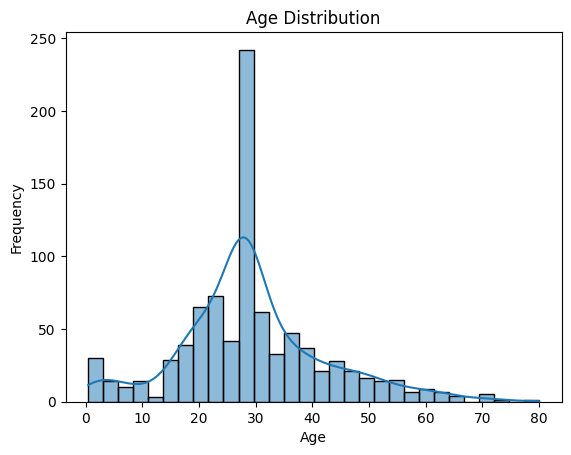

In [37]:
import matplotlib.pyplot as plt
sns.histplot(data['age'],kde=True)
plt.title("Age Distribution")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

### By plotting countplot we will get to know that how many are survived and the number of poeple not survived.

Text(0, 0.5, 'Count')

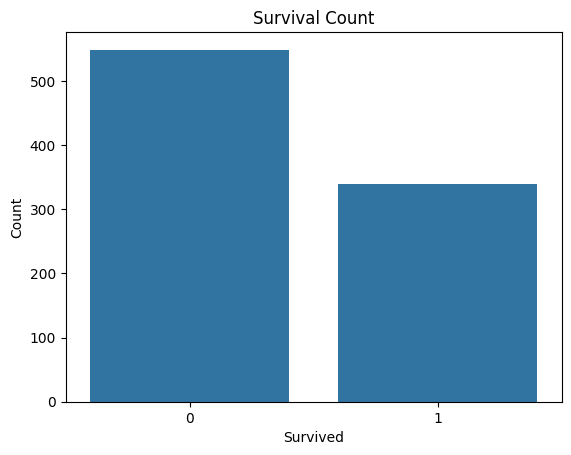

In [39]:
sns.countplot(x='survived',data=data)
plt.title("Survival Count")
plt.xlabel("Survived")
plt.ylabel("Count")

### By this countplot we will get to know the number of male and female as male:0 and female:1.

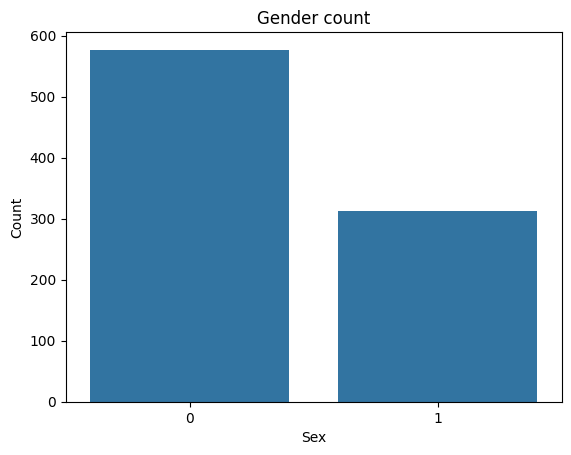

In [41]:
sns.countplot(x='sex',data=data)
plt.title("Gender count")
plt.xlabel("Sex")
plt.ylabel("Count")
plt.show()

### Now in EDA process we will going one step further using Bivariate Analysis using two columns.

### Plotting Bargraph for our sex and survived column to get to know how many male and female survived.

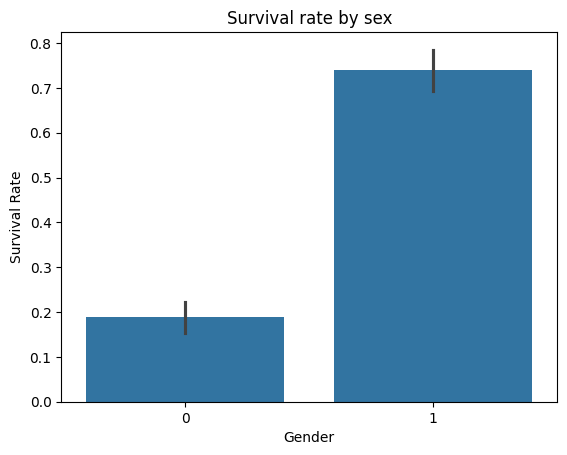

In [50]:

sns.barplot(x='sex',y='survived',data=data)
plt.title('Survival rate by sex')
plt.xlabel("Gender")
plt.ylabel("Survival Rate")
plt.show()


#### In this plot using kdeplot we are plotting the age and survived column so we get an idea the approximation age that are survived and that are not survived.

<ipython-input-59-9292089f7674>:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['survived']==1]['age'],label='Survived',shade=True)
<ipython-input-59-9292089f7674>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data[data['survived']==0]['age'],label='Not Survived',shade=True)


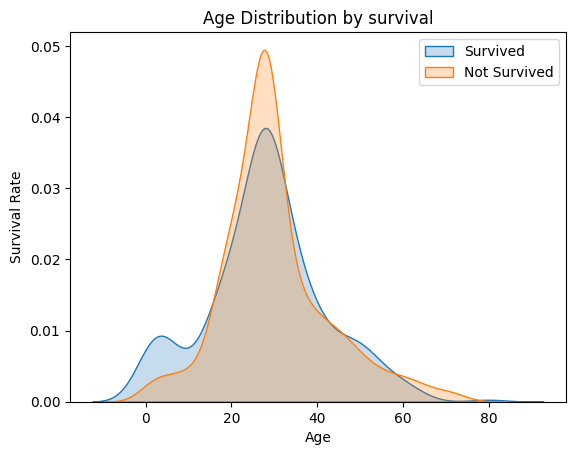

In [59]:
sns.kdeplot(data[data['survived']==1]['age'],label='Survived',shade=True)
sns.kdeplot(data[data['survived']==0]['age'],label='Not Survived',shade=True)
plt.title("Age Distribution by survival")
plt.xlabel("Age")
plt.ylabel("Survival Rate")
plt.legend()
plt.show()

### Finally in EDA process we are using multivariate analysis using more than two columns and building reationships between the columns or features.

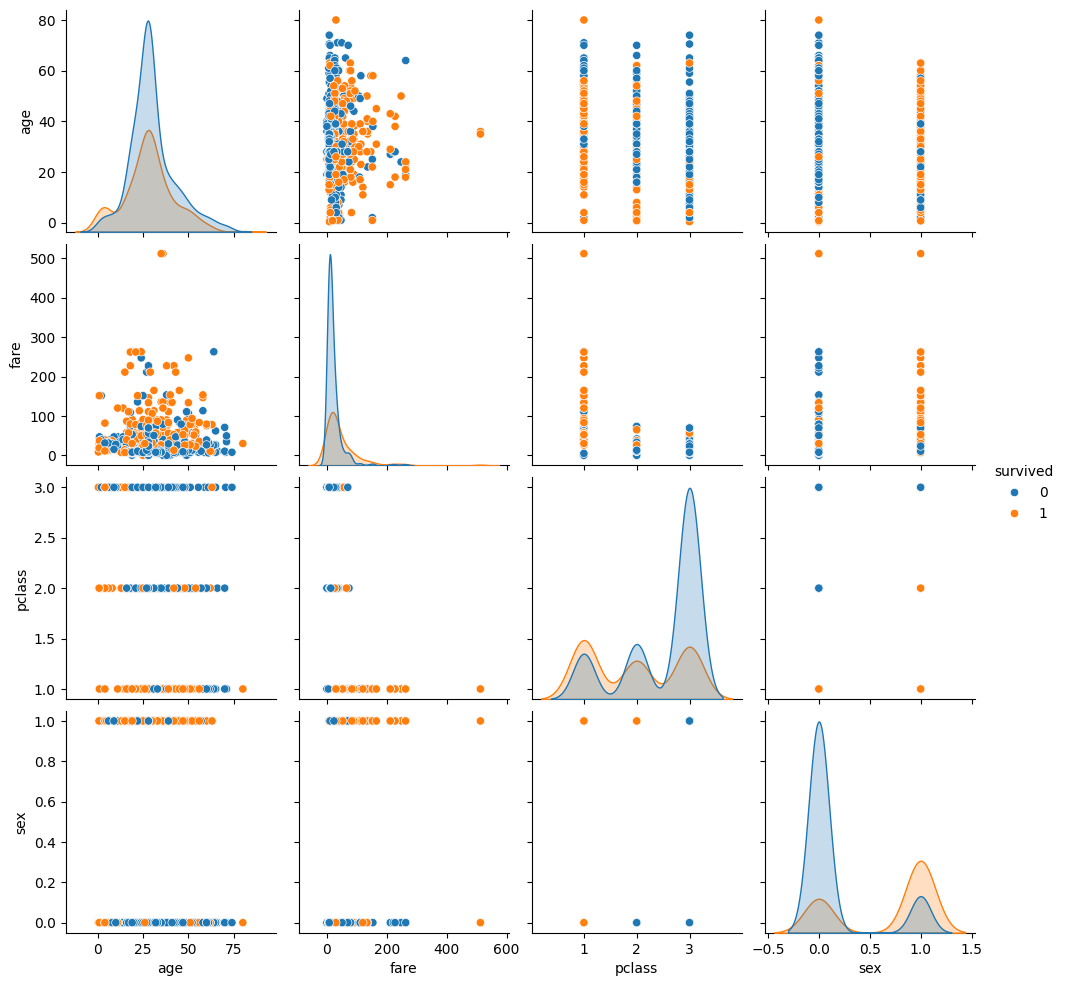

In [60]:
sns.pairplot(data[['survived','age','fare','pclass','sex']],hue='survived')
plt.show()